# Assignment 4


In [1]:
import random
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import sys
from io import StringIO
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statistics as stat

# 2. Data Exploration and Statistics

# What hour in a day peopel are generally most active

### Reading and updating data

In [2]:
hourdata = pd.read_csv("fitbit_data/hourlySteps_merged.csv")
hourdata['ActivityHour'] = pd.to_datetime(hourdata['ActivityHour'])
hourdata['Hour'] = pd.DatetimeIndex(hourdata['ActivityHour']).hour
hourdata

,Id,ActivityHour,StepTotal,Hour
0,1503960366,2016-04-12 00:00:00,373,0
1,1503960366,2016-04-12 01:00:00,160,1
2,1503960366,2016-04-12 02:00:00,151,2
3,1503960366,2016-04-12 03:00:00,0,3
4,1503960366,2016-04-12 04:00:00,0,4
...,...,...,...,...
22094,8877689391,2016-05-12 10:00:00,514,10
22095,8877689391,2016-05-12 11:00:00,1407,11
22096,8877689391,2016-05-12 12:00:00,3135,12
22097,8877689391,2016-05-12 13:00:00,307,13


### Visualization of the most/least active hour's activity

In [3]:
sortByHour = hourdata.groupby("Hour").sum()
sortByHour['Hour'] = sortByHour.index
sortByHour.head()

,Id,StepTotal,Hour
Hour,,,
0,4526681710485,39404,0
1,4519673966314,21555,1
2,4519673966314,15964,2
3,4519673966314,5996,3
4,4515354262737,11836,4


In [4]:
mostActiveHour = sortByHour[sortByHour['StepTotal'] == sortByHour['StepTotal'].max()]['Hour'].iat[0]
print("The most active hour of the day is:", mostActiveHour)
mostActiveHourData = hourdata[hourdata['Hour'] == mostActiveHour]
mostActiveHourData = mostActiveHourData.groupby("Id").sum()
mostActiveHourData['Id'] = mostActiveHourData.index.astype(str)
mostActiveHourData.head()

The most active hour of the day is: 18


,StepTotal,Hour,Id
Id,,,
1503960366,46683,540,1503960366
1624580081,10519,540,1624580081
1644430081,21346,522,1644430081
1844505072,3213,540,1844505072
1927972279,1843,540,1927972279


In [5]:
Id = mostActiveHourData['Id'].values.tolist()
stepsTaken = mostActiveHourData['StepTotal'].values.tolist()
averageStepDuringMostActiveHour = stat.mean(stepsTaken)
print("average steps taken during the most active hour is:", averageStepDuringMostActiveHour)

average steps taken during the most active hour is: 16449.939393939392


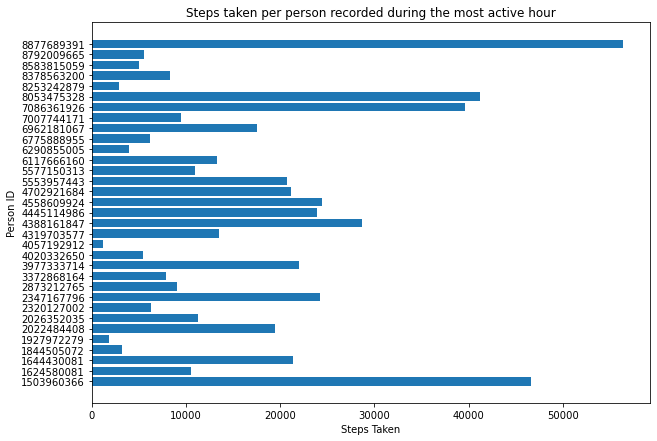

In [6]:
plt.rcParams["figure.figsize"] = (10,7)
plt.barh(Id, stepsTaken)
plt.title('Steps taken per person recorded during the most active hour')
plt.ylabel('Person ID')
plt.xlabel('Steps Taken')
plt.show()

In [7]:
leastActiveHour = sortByHour[sortByHour['StepTotal'] == sortByHour['StepTotal'].min()]['Hour'].iat[0]
print("The least active hour of the day is:", leastActiveHour)
leastActiveHourData = hourdata[hourdata['Hour'] == leastActiveHour]
leastActiveHourData = leastActiveHourData.groupby("Id").sum()
leastActiveHourData['Id'] = leastActiveHourData.index.astype(str)
leastActiveHourData.head()

The least active hour of the day is: 3


,StepTotal,Hour,Id
Id,,,
1503960366,355,90,1503960366
1624580081,270,93,1624580081
1644430081,237,90,1644430081
1844505072,52,93,1844505072
1927972279,22,93,1927972279


In [8]:
Id = leastActiveHourData['Id'].values.tolist()
stepsTaken = leastActiveHourData['StepTotal'].values.tolist()

averageStepDuringLeastActiveHour = stat.mean(stepsTaken)
print("average steps taken during the least active hour is:", averageStepDuringLeastActiveHour)

average steps taken during the least active hour is: 181.6969696969697


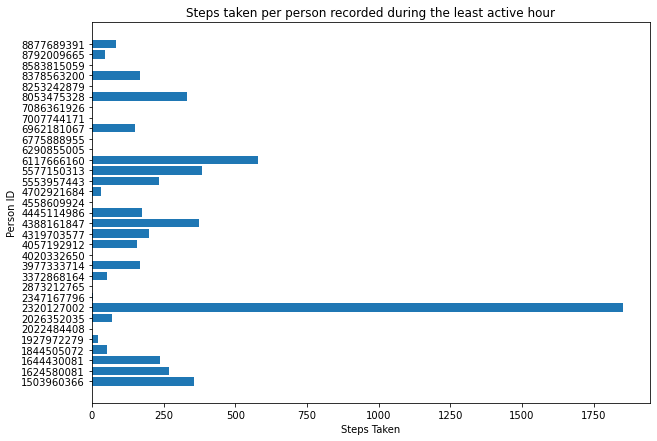

In [9]:
plt.rcParams["figure.figsize"] = (10,7)
plt.barh(Id, stepsTaken)
plt.title('Steps taken per person recorded during the least active hour')
plt.ylabel('Person ID')
plt.xlabel('Steps Taken')
plt.show()

### Visualization of the most/least active person's hourly activity

In [10]:
steps = hourdata.groupby("Id").sum()
steps['Id'] = steps.index
steps.head()

,StepTotal,Hour,Id
Id,,,
1503960366,374546,8214,1503960366
1624580081,177750,8400,1624580081
1644430081,217927,8070,1644430081
1844505072,79942,8335,1844505072
1927972279,28400,8400,1927972279


In [11]:
mostActiveID = steps[steps['StepTotal'] == steps['StepTotal'].max()]['Id'].iat[0]
print("The most active person ID is:", mostActiveID)
mostActive = hourdata[hourdata['Id'] == mostActiveID]
mostActive = mostActive.groupby('Hour').sum()
mostActive['Hour'] = mostActive.index

mostActive.head()

The most active person ID is: 8877689391


,Id,StepTotal,Hour
Hour,,,
0,275208371121,2728,0
1,275208371121,1887,1
2,275208371121,1983,2
3,275208371121,84,3
4,275208371121,0,4


In [12]:
hourr = mostActive['Hour'].values.tolist()
stepsTaken = mostActive['StepTotal'].values.tolist()
hour = []
for i in range(len(hourr)):
    hour.append(str(hourr[i]))

largestAmountOfStepsOfMostActivePerson = max(stepsTaken)
leastAmountOfStepsOfMostActivePerson = min(i for i in stepsTaken if i > 100)
print("Most active person max steps is:", largestAmountOfStepsOfMostActivePerson)
print("Most active person min steps > 100 is:", leastAmountOfStepsOfMostActivePerson)

Most active person max steps is: 65430
Most active person min steps > 100 is: 1887


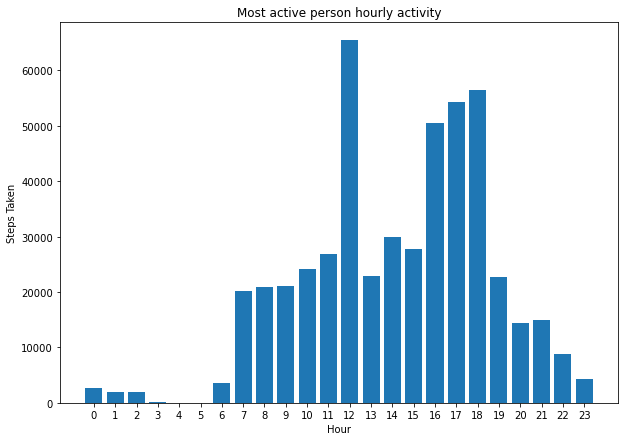

In [13]:
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(hour, stepsTaken)
plt.title('Most active person hourly activity')
plt.xlabel('Hour')
plt.ylabel('Steps Taken')
plt.show()

In [14]:
leastActiveID = steps[steps['StepTotal'] == steps['StepTotal'].min()]['Id'].iat[0]
print("The least active person ID is:", leastActiveID)
leastActive = hourdata[hourdata['Id'] == leastActiveID]
leastActive = leastActive.groupby('Hour').sum()
leastActive['Hour'] = leastActive.index

leastActive.head()

The least active person ID is: 4057192912


,Id,StepTotal,Hour
Hour,,,
0,16228771648,7,0
1,16228771648,0,1
2,16228771648,0,2
3,16228771648,156,3
4,16228771648,0,4


In [15]:
hourr = leastActive['Hour'].values.tolist()
stepsTaken = leastActive['StepTotal'].values.tolist()
hour = []
for i in range(len(hourr)):
    hour.append(str(hourr[i]))
    
largestAmountOfStepsOfLeastActivePerson = max(stepsTaken)
print("Least active person max steps is:", largestAmountOfStepsOfLeastActivePerson)

Least active person max steps is: 2295


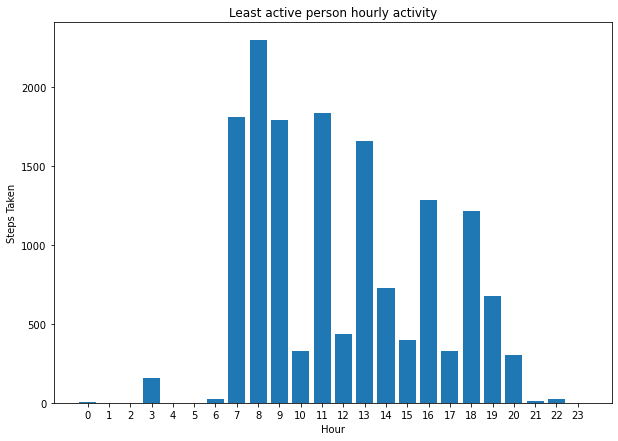

In [16]:
plt.rcParams["figure.figsize"] = (10,7)
plt.bar(hour, stepsTaken)
plt.title('Least active person hourly activity')
plt.xlabel('Hour')
plt.ylabel('Steps Taken')
plt.show()

### Visualization of when people are generally active

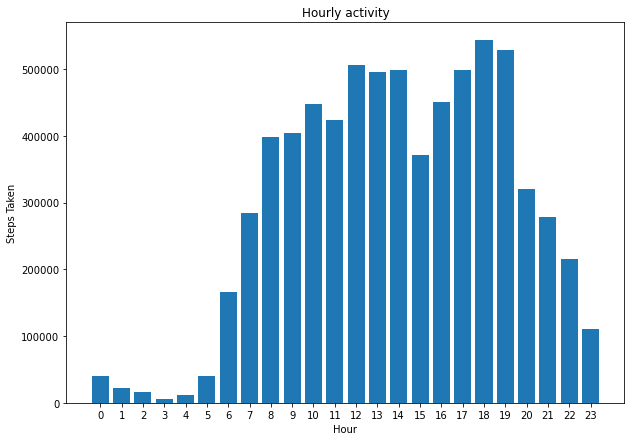

In [17]:
hour = sortByHour['Hour'].astype(str).tolist()
steps = sortByHour['StepTotal'].values.tolist()

plt.rcParams["figure.figsize"] = (10,7)
plt.bar(hour, steps)
plt.title('Hourly activity')
plt.xlabel('Hour')
plt.ylabel('Steps Taken')
plt.show()

# Which weekday are people most active?

In [19]:
dailydata = pd.read_csv("fitbit_data/DailySteps_merged.csv")
dailydata['ActivityDay'] = pd.to_datetime(dailydata['ActivityDay'])
dailydata['Weekday'] = dailydata['ActivityDay'].dt.day_name()
dailydata

,Id,ActivityDay,StepTotal,Weekday
0,1503960366,2016-04-12,13162,Tuesday
1,1503960366,2016-04-13,10735,Wednesday
2,1503960366,2016-04-14,10460,Thursday
3,1503960366,2016-04-15,9762,Friday
4,1503960366,2016-04-16,12669,Saturday
...,...,...,...,...
935,8877689391,2016-05-08,10686,Sunday
936,8877689391,2016-05-09,20226,Monday
937,8877689391,2016-05-10,10733,Tuesday
938,8877689391,2016-05-11,21420,Wednesday


In [20]:
sortByDay = dailydata.groupby("Weekday").sum()
sortByDay.head()

,Id,StepTotal
Weekday,,
Friday,615005670045,938477
Monday,583191565168,933704
Saturday,608601309337,1010969
Sunday,586564433332,838921
Thursday,711079752135,1088658


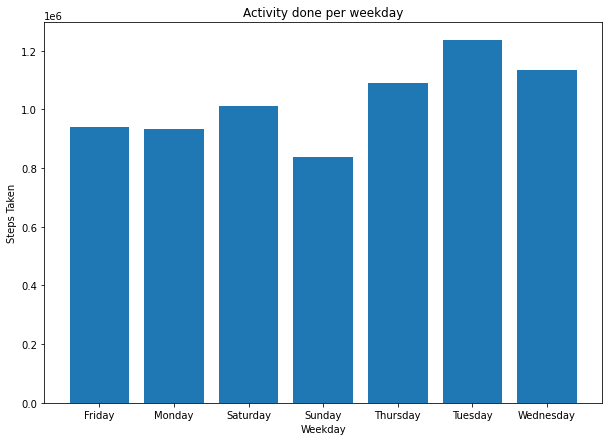

In [21]:
weekday = sortByDay.index.tolist()
steps = sortByDay['StepTotal'].values.tolist()

plt.rcParams["figure.figsize"] = (10,7)
plt.bar(weekday, steps)
plt.title('Activity done per weekday')
plt.xlabel('Weekday')
plt.ylabel('Steps Taken')
plt.show()

# Does more steps lead to higher calorie burn?

In [22]:
caloriesData = pd.read_csv("fitbit_data/dailyCalories_merged.csv")

stepsCaloriesDataList = [caloriesData, dailydata]
stepsCaloriesData = pd.concat(stepsCaloriesDataList, axis = 1)
stepsCaloriesData

,Id,ActivityDay,Calories,Id,ActivityDay,StepTotal,Weekday
0,1503960366,4/12/2016,1985,1503960366,2016-04-12,13162,Tuesday
1,1503960366,4/13/2016,1797,1503960366,2016-04-13,10735,Wednesday
2,1503960366,4/14/2016,1776,1503960366,2016-04-14,10460,Thursday
3,1503960366,4/15/2016,1745,1503960366,2016-04-15,9762,Friday
4,1503960366,4/16/2016,1863,1503960366,2016-04-16,12669,Saturday
...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,2847,8877689391,2016-05-08,10686,Sunday
936,8877689391,5/9/2016,3710,8877689391,2016-05-09,20226,Monday
937,8877689391,5/10/2016,2832,8877689391,2016-05-10,10733,Tuesday
938,8877689391,5/11/2016,3832,8877689391,2016-05-11,21420,Wednesday


In [23]:
calories = stepsCaloriesData['Calories'].values.tolist()
steps = stepsCaloriesData['StepTotal'].values.tolist()

test1 = stats.pearsonr(calories, steps)
r = test1[0]
pval1 = test1[1]

test2 = stats.kendalltau(calories, steps)
tau = test2[0]
pval2 = test2[1]

print("The Pearson correlation coefficient is:", r)
print("The p-value of the Pearson correlation test is:", pval1)
print("The Kendall correlation coefficient is:", tau)
print("The p-value of the Kendall correlation test is:", pval2)

The Pearson correlation coefficient is: 0.5915680862453352
The p-value of the Pearson correlation test is: 8.203860328512932e-90
The Kendall correlation coefficient is: 0.39744406742143873
The p-value of the Kendall correlation test is: 7.526985153798703e-74


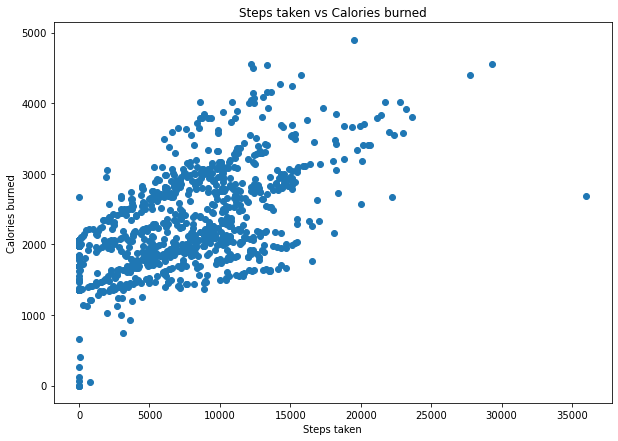

In [24]:
plt.scatter(steps,calories)
plt.title('Steps taken vs Calories burned')
plt.ylabel('Calories burned')
plt.xlabel('Steps taken')
plt.show()

# Does longer active duration increase calories burns?

In [25]:
intensityData = pd.read_csv("fitbit_data/dailyIntensities_merged.csv")
intensityData

intensityCaloriesDataList = [intensityData, caloriesData]
intensityCaloriesData = pd.concat(intensityCaloriesDataList, axis = 1)
intensityCaloriesData['TotalActiveMinutes'] = intensityCaloriesData['SedentaryMinutes'] + intensityCaloriesData['LightlyActiveMinutes'] + intensityCaloriesData['FairlyActiveMinutes'] + intensityCaloriesData['VeryActiveMinutes']
intensityCaloriesData

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Id,ActivityDay,Calories,TotalActiveMinutes
0,1503960366,4/12/2016,728,328,13,25,0.00,6.06,0.55,1.88,1503960366,4/12/2016,1985,1094
1,1503960366,4/13/2016,776,217,19,21,0.00,4.71,0.69,1.57,1503960366,4/13/2016,1797,1033
2,1503960366,4/14/2016,1218,181,11,30,0.00,3.91,0.40,2.44,1503960366,4/14/2016,1776,1440
3,1503960366,4/15/2016,726,209,34,29,0.00,2.83,1.26,2.14,1503960366,4/15/2016,1745,998
4,1503960366,4/16/2016,773,221,10,36,0.00,5.04,0.41,2.71,1503960366,4/16/2016,1863,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.00,6.80,0.20,1.08,8877689391,5/8/2016,2847,1440
936,8877689391,5/9/2016,1131,217,19,73,0.05,6.24,0.80,11.10,8877689391,5/9/2016,3710,1440
937,8877689391,5/10/2016,1187,224,11,18,0.00,6.28,0.46,1.35,8877689391,5/10/2016,2832,1440
938,8877689391,5/11/2016,1127,213,12,88,0.00,5.89,0.41,13.22,8877689391,5/11/2016,3832,1440


In [26]:
totalActiveMinutes = intensityCaloriesData['TotalActiveMinutes'].values.tolist()
caloriesBurned = intensityCaloriesData['Calories'].values.tolist()

test1 = stats.pearsonr(totalActiveMinutes, caloriesBurned)
r = test1[0]
pval1 = test1[1]

test2 = stats.kendalltau(totalActiveMinutes, caloriesBurned)
tau = test2[0]
pval2 = test2[1]

print("The Pearson correlation coefficient is:", r)
print("The p-value of the Pearson correlation test is:", pval1)
print("The Kendall correlation coefficient is:", tau)
print("The p-value of the Kendall correlation test is:", pval2)

The Pearson correlation coefficient is: 0.09495146898712173
The p-value of the Pearson correlation test is: 0.0035697971242938838
The Kendall correlation coefficient is: 0.025203416438578347
The p-value of the Kendall correlation test is: 0.2853693484713047


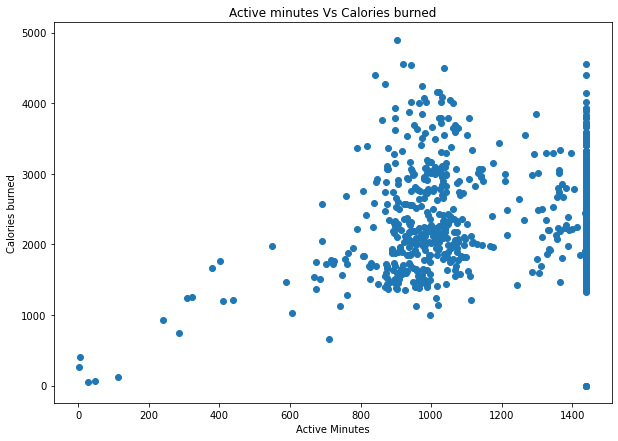

In [27]:
plt.scatter(totalActiveMinutes, caloriesBurned)
plt.title('Active minutes Vs Calories burned')
plt.xlabel('Active Minutes')
plt.ylabel('Calories burned')
plt.show()

# Does longer exercise duration increase sleep duration?

In [28]:
sleepData = pd.read_csv("fitbit_data/sleepDay_merged.csv")

intensitySleepDataList = [intensityData, sleepData]
intensitySleepData = pd.concat(intensitySleepDataList, axis = 1)
intensitySleepData['TotalActiveMinutes'] = intensitySleepData['SedentaryMinutes'] + intensitySleepData['LightlyActiveMinutes'] + intensitySleepData['FairlyActiveMinutes'] + intensitySleepData['VeryActiveMinutes']
            
intensitySleepData = intensitySleepData.dropna()
intensitySleepData.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalActiveMinutes
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88,1.503960e+09,4/12/2016 12:00:00 AM,1.0,327.0,346.0,1094
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57,1.503960e+09,4/13/2016 12:00:00 AM,2.0,384.0,407.0,1033
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44,1.503960e+09,4/15/2016 12:00:00 AM,1.0,412.0,442.0,1440
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14,1.503960e+09,4/16/2016 12:00:00 AM,2.0,340.0,367.0,998
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71,1.503960e+09,4/17/2016 12:00:00 AM,1.0,700.0,712.0,1040


In [29]:
sleepingTime = intensitySleepData['TotalMinutesAsleep'].values.tolist()
totalActiveMinutes = intensitySleepData['TotalActiveMinutes'].values.tolist()

test1 = stats.pearsonr(sleepingTime, totalActiveMinutes)
r = test1[0]
pval1 = test1[1]

test2 = stats.kendalltau(sleepingTime, totalActiveMinutes)
tau = test2[0]
pval2 = test2[1]
print("The Pearson correlation coefficient is:", r)
print("The p-value of the Pearson correlation test is:", pval1)
print("The Kendall correlation coefficient is:", tau)
print("The p-value of the Kendall correlation test is:", pval2)

The Pearson correlation coefficient is: 0.0895920997667564
The p-value of the Pearson correlation test is: 0.06893165154349089
The Kendall correlation coefficient is: 0.07681578743105177
The p-value of the Kendall correlation test is: 0.0347723037907211


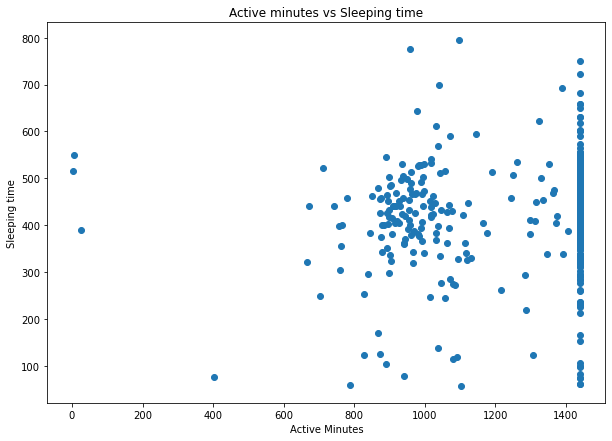

In [30]:
plt.scatter(totalActiveMinutes, sleepingTime)
plt.title('Active minutes vs Sleeping time')
plt.xlabel('Active Minutes')
plt.ylabel('Sleeping time')
plt.show()

# Does longer exercise duration decrease time spent on bed without sleeping?

In [31]:
intensitySleepData['TimeSpentNotAsleep'] = intensitySleepData['TotalTimeInBed'] - intensitySleepData['TotalMinutesAsleep']
intensitySleepData.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalActiveMinutes,TimeSpentNotAsleep
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88,1.503960e+09,4/12/2016 12:00:00 AM,1.0,327.0,346.0,1094,19.0
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57,1.503960e+09,4/13/2016 12:00:00 AM,2.0,384.0,407.0,1033,23.0
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44,1.503960e+09,4/15/2016 12:00:00 AM,1.0,412.0,442.0,1440,30.0
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14,1.503960e+09,4/16/2016 12:00:00 AM,2.0,340.0,367.0,998,27.0
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71,1.503960e+09,4/17/2016 12:00:00 AM,1.0,700.0,712.0,1040,12.0


In [32]:
timeNotAsleep = intensitySleepData['TimeSpentNotAsleep'].values.tolist()
totalActiveMinutes = intensitySleepData['TotalActiveMinutes'].values.tolist()

test1 = stats.pearsonr(totalActiveMinutes, timeNotAsleep)
r = test1[0]
pval1 = test1[1]
test2 = stats.kendalltau(totalActiveMinutes, timeNotAsleep)
tau = test2[0]
pval2 = test2[1]

print("The Pearson correlation coefficient is:", r)
print("The p-value of the Pearson correlation test is:", pval1)
print("The Kendall correlation coefficient is:", tau)
print("The p-value of the Kendall correlation test is:", pval2)

The Pearson correlation coefficient is: 0.1232336433898257
The p-value of the Pearson correlation test is: 0.01219767675849809
The Kendall correlation coefficient is: 0.11879106761759729
The p-value of the Kendall correlation test is: 0.0011895229071250272


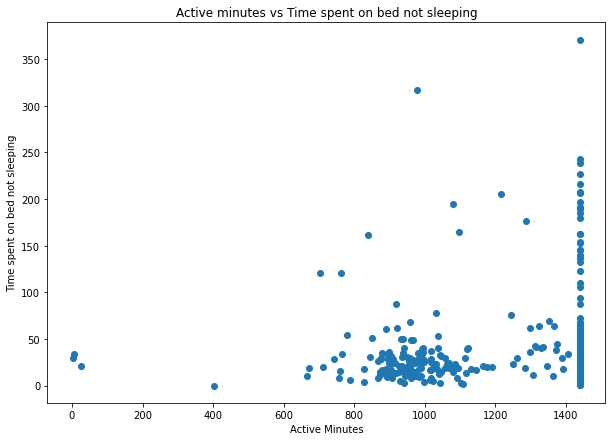

In [33]:
plt.scatter(totalActiveMinutes, timeNotAsleep)
plt.title('Active minutes vs Time spent on bed not sleeping')
plt.xlabel('Active Minutes')
plt.ylabel('Time spent on bed not sleeping')
plt.show()

# 3. Regression Models

## 3.1 Active duration and sleep duration

Import data 

In [34]:
fitbit_daily = pd.read_csv('fitbit_data/dailyActivity_merged.csv')
# remove non active days.
fitbit_daily = fitbit_daily.drop(fitbit_daily[fitbit_daily.TotalSteps == 0].index)
fitbit_daily['ActivityDate'] = pd.to_datetime(fitbit_daily['ActivityDate'])

# Drop distances
daily_step_min_cal = fitbit_daily.drop(['TotalDistance','TrackerDistance',
                               'LoggedActivitiesDistance','VeryActiveDistance',
                               'ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance'],axis=1)

In [35]:
sleep_day = pd.read_csv('fitbit_data/sleepDay_merged.csv')
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'])

Merge dataframes 

In [36]:
#merge
merge_sleep_act = pd.merge(daily_step_min_cal, sleep_day, left_on=  ['Id', 'ActivityDate'],
                   right_on= ['Id', 'SleepDay'], 
                   how = 'inner')
len(merge_sleep_act["Id"].unique())

24

Next, pair plots are made to see the relations between features

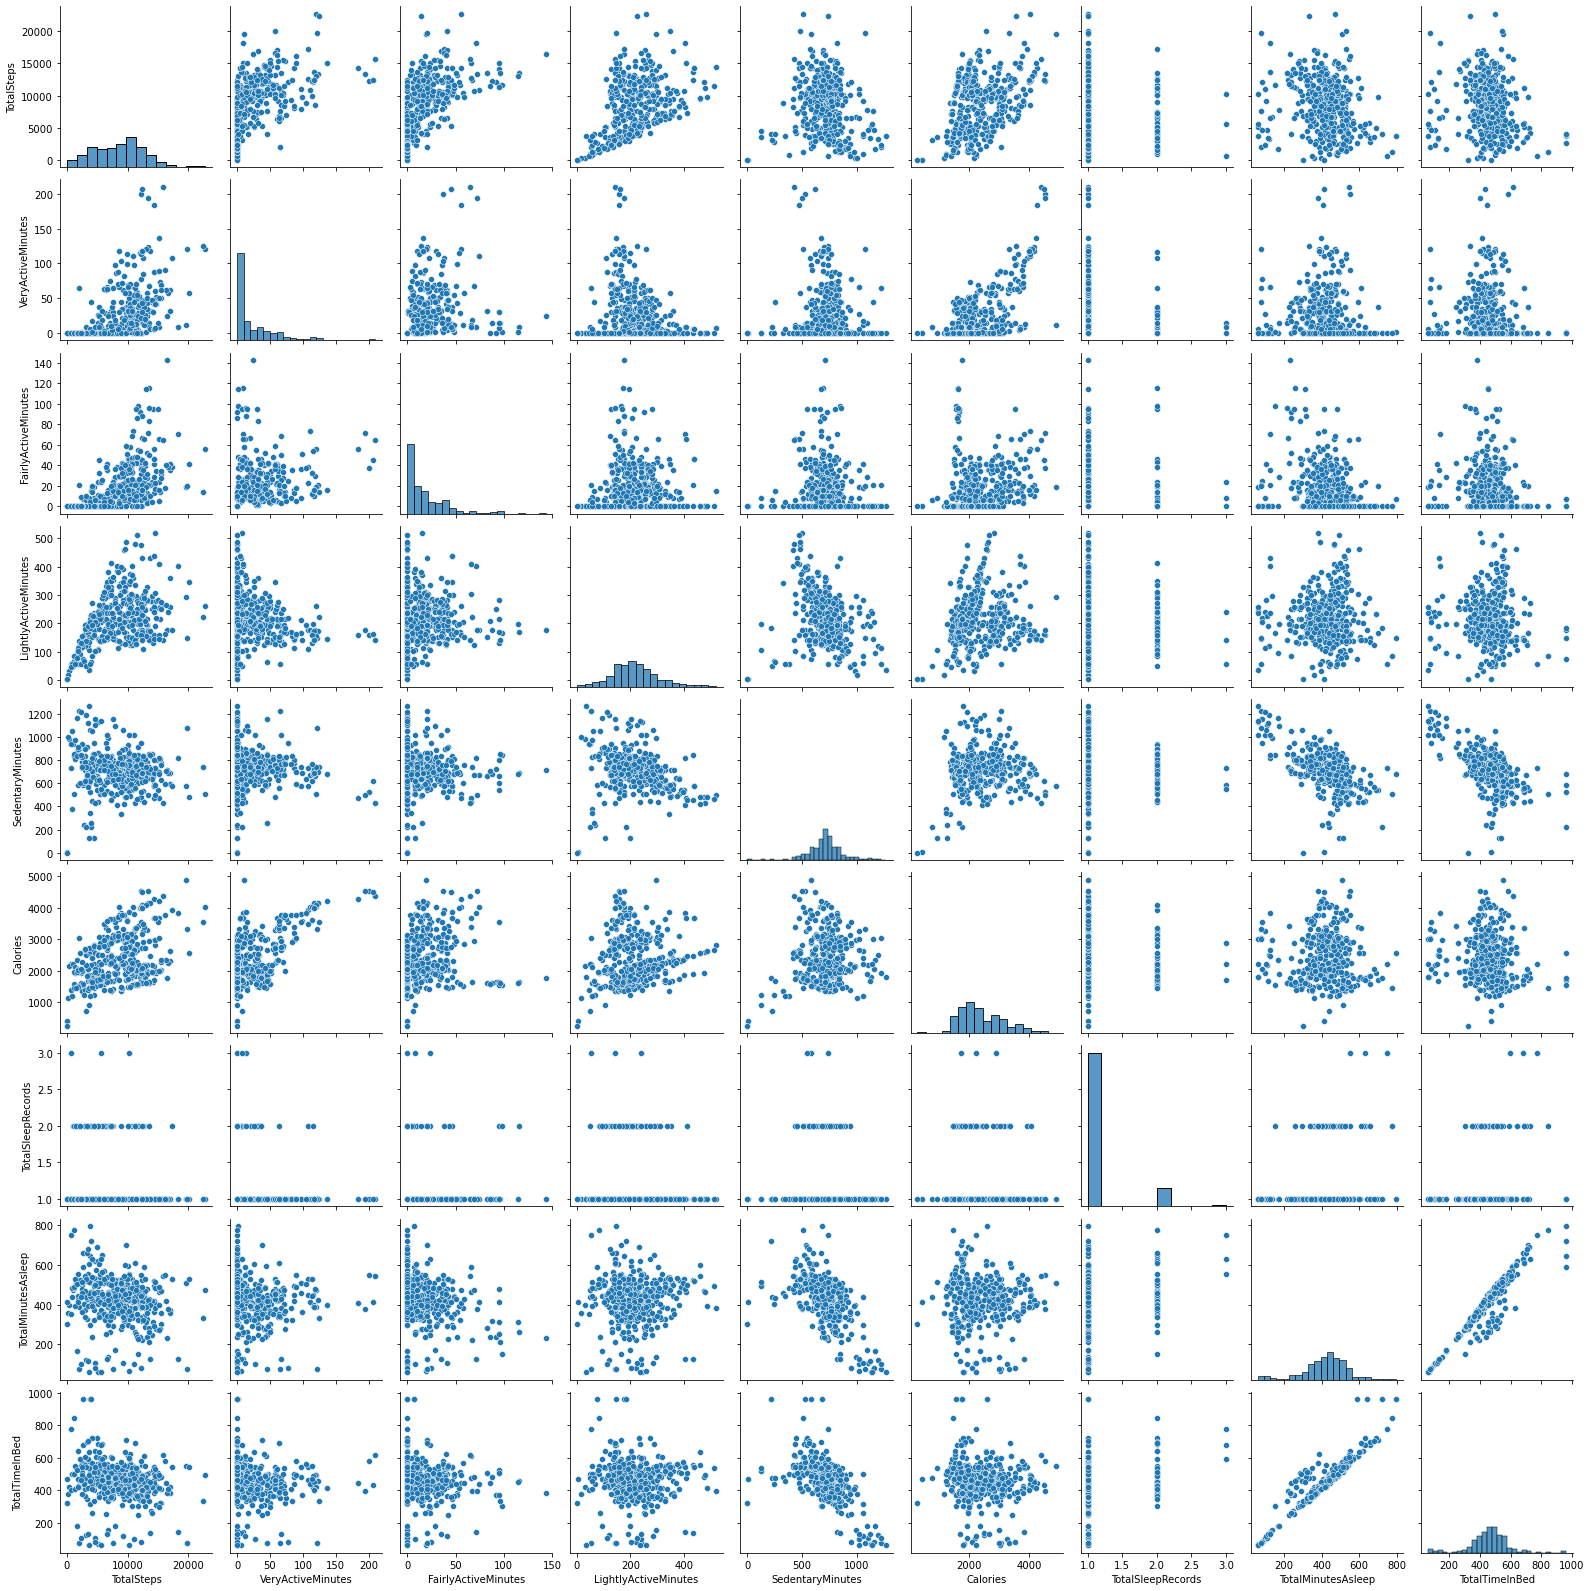

In [37]:
sns.pairplot(merge_sleep_act.drop(['Id','ActivityDate'], axis=1))

Further investigation on correlation coefficents

In [38]:
correl=merge_sleep_act.corr()
correl

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
Id,1.000000,0.011345,0.270355,-0.021372,-0.180689,-0.007420,0.402974,-0.012552,0.080117,0.002112
TotalSteps,0.011345,1.000000,0.540876,0.569649,0.418884,-0.131632,0.411996,-0.162490,-0.186866,-0.164060
VeryActiveMinutes,0.270355,0.540876,1.000000,0.316221,-0.209933,-0.016930,0.610489,-0.119740,-0.090436,-0.112488
FairlyActiveMinutes,-0.021372,0.569649,0.316221,1.000000,-0.011308,-0.040660,0.179990,-0.078356,-0.244535,-0.111152
LightlyActiveMinutes,-0.180689,0.418884,-0.209933,-0.011308,1.000000,-0.264182,0.117371,-0.073248,0.032914,-0.023568
SedentaryMinutes,-0.007420,-0.131632,-0.016930,-0.040660,-0.264182,1.000000,0.095315,-0.041876,-0.599394,-0.618713
Calories,0.402974,0.411996,0.610489,0.179990,0.117371,0.095315,1.000000,-0.051060,-0.028526,-0.132507
TotalSleepRecords,-0.012552,-0.162490,-0.119740,-0.078356,-0.073248,-0.041876,-0.051060,1.000000,0.165912,0.172917
TotalMinutesAsleep,0.080117,-0.186866,-0.090436,-0.244535,0.032914,-0.599394,-0.028526,0.165912,1.000000,0.930457
TotalTimeInBed,0.002112,-0.164060,-0.112488,-0.111152,-0.023568,-0.618713,-0.132507,0.172917,0.930457,1.000000


T-test based on Generalized Least Squares regression

In [39]:
X1 = merge_sleep_act[['TotalSteps','VeryActiveMinutes','FairlyActiveMinutes',
                      'LightlyActiveMinutes','SedentaryMinutes','Calories']]
X2 = sm.add_constant(X1)
est = sm.GLS(merge_sleep_act['TotalMinutesAsleep'], X2)
est2 = est.fit()
print(est2.summary())

                            GLS Regression Results                            
Dep. Variable:     TotalMinutesAsleep   R-squared:                       0.486
Model:                            GLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     64.03
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           9.74e-56
Time:                        11:14:36   Log-Likelihood:                -2419.5
No. Observations:                 413   AIC:                             4853.
Df Residuals:                     406   BIC:                             4881.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  791.3818 

Regression models

In [40]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X = merge_sleep_act[['TotalSteps','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']].values
y = merge_sleep_act['TotalMinutesAsleep'].values

# split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

model = make_pipeline(PolynomialFeatures(degree = 2),
                      StandardScaler(),
                      Ridge(alpha = 0.4291855450643776, solver = 'sag',
                                   max_iter = 100000))

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# score
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, squared=False))

0.7112577379642342
56.99358854877587


Results for best parameters
Linear Regression:

R^2 = 0.7173359073171439,
RMSE = 56.39052617337625

SGDRegressor:

R^2 = 0.7081713842773373,
RMSE = 57.297379918297686

Lasso:

R^2 = 0.708178061851278,
RMSE = 57.2967243799798

Ridge:

R^2 = 0.7111822384579065,
RMSE = 57.00103932256017

Cross-valiation is performed to find tune hyperparameters

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits = 10)
alphas = np.linspace(0.000001, 100, 700)

# hyperparameters tuning for SGDRegressor
pipe = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('scaler', StandardScaler()),
                 ('regression', SGDRegressor(max_iter = 10000))])
param_grid = {'regression__alpha': alphas,
             'regression__penalty': ['l1', 'l2', 'elasticnet']}

search = GridSearchCV(pipe, param_grid, scoring=['r2','neg_root_mean_squared_error'], 
                      refit = 'neg_root_mean_squared_error', cv=folds)
search.fit(X_train,y_train)
print(search.best_params_)

{'regression__alpha': 0.2861240300429184, 'regression__penalty': 'l1'}


In [43]:
# hyperparameters tuning for Lasso
pipe = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('scaler', StandardScaler()),
                 ('regression', Lasso(max_iter = 1000000))])
param_grid = {'regression__alpha': alphas,
             'regression__selection': ['cyclic', 'random']}

search = GridSearchCV(pipe, param_grid, scoring=['r2','neg_root_mean_squared_error'], 
                      refit = 'neg_root_mean_squared_error', cv=folds)
search.fit(X_train,y_train)
print(search.best_params_)

{'regression__alpha': 0.2861240300429184, 'regression__selection': 'cyclic'}


In [44]:
# hyperparameters tuning for Ridge
pipe = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                 ('scaler', StandardScaler()),
                 ('regression', Ridge(max_iter = 10000))])
param_grid = {'regression__alpha': alphas,
             'regression__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

search = GridSearchCV(pipe, param_grid, scoring=['r2','neg_root_mean_squared_error'], 
                      refit = 'neg_root_mean_squared_error', cv=folds)
search.fit(X_train,y_train)
print(search.best_params_)

{'regression__alpha': 0.4291855450643776, 'regression__solver': 'sag'}


## 3.2 Steps and time participants spend in bed awake

In [45]:
# Data
activity = pd.read_csv('fitbit_data/dailyActivity_merged.csv')
sleep = pd.read_csv('fitbit_data/sleepDay_merged.csv')

First, I do some pre-processing of the data to allow for an analysis of the relationship between steps and time it takes to fall asleep. 
I also want to know how many participants are in the original files and how many remain after this pre-processing.
Code used for the 'pre-processing' section of the report on time spent in bed awake. 

In [46]:
from sklearn import preprocessing

# Merging the two data frames using data and ID
activity.rename(columns = {'ActivityDate':'Date'}, inplace = True) # renaming date to allow merging
activity['Date'] = pd.to_datetime(activity['Date']) # making it datetime
print(f" activity data has {len(activity['Id'].unique())} unique ID's and {len(activity)} rows") # how many ID's?

# making a total weartime column to allow futher cleaning
minutes_cols = [col for col in activity.columns if col.endswith('Minutes')] 
activity['total_weartime'] = activity[minutes_cols].sum(axis=1) 

# now, the sleep data 
sleep['awake_bedmin'] = sleep['TotalTimeInBed'] - sleep['TotalMinutesAsleep'] # making a col for time spent in bed awake
sleep.rename(columns = {'SleepDay': 'Date'}, inplace = True) # renaming to allow merging
sleep['Date'] = pd.to_datetime(sleep['Date']) # and making it datetime
print(f" sleep data has {len(sleep['Id'].unique())} unique ID's and {len(sleep)} rows") # how many ID's?

# merging the df's
df_merged = pd.merge(activity, sleep, on = ['Id', 'Date']) 
print(len(df_merged.columns)) # how many cols? 

df_merged.sort_values(by = 'total_weartime') # seeing whether there are people who didn't really wear the fitbit

print(f"  data has {len(df_merged['Id'].unique())} unique ID's and {len(df_merged)} rows before exclusion")# how many participants are left?


# Then some cleaning is necessary, since some participants didn't really wear their fitbit

df = df_merged[df_merged['total_weartime'] > 120].copy() # excluding the cheaters

print(f"  data has {len(df['Id'].unique())} unique ID's and {len(df)} rows after weartime exclusion")# how many participants are left?

# looking at whether there are any weird values in the df - seems like the sleep data is a little bad
df.describe()

df.sort_values(by = 'TotalTimeInBed', ascending = False)

# print(len(df.loc[(df['TotalTimeInBed'] < 120) | (df['TotalTimeInBed'] > 730 )]))

df = df.loc[(df['TotalTimeInBed'] > 120) & (df['TotalTimeInBed'] < 780 )]

print(f"  data has {len(df['Id'].unique())} unique ID's and {len(df)} rows after bedtime exclusion")# how many participants are left?


len(df)

# scaling the total steps column. 

for i in minutes_cols:
    df[i+'_scaled'] = preprocessing.scale(df[i].values)

df['totalsteps_scaled'] = preprocessing.scale(df['TotalSteps'].values)
df.describe()


 activity data has 33 unique ID's and 940 rows
 sleep data has 24 unique ID's and 413 rows
20
  data has 24 unique ID's and 413 rows before exclusion
  data has 24 unique ID's and 411 rows after weartime exclusion
  data has 21 unique ID's and 394 rows after bedtime exclusion


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,total_weartime,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,awake_bedmin,VeryActiveMinutes_scaled,FairlyActiveMinutes_scaled,LightlyActiveMinutes_scaled,SedentaryMinutes_scaled,totalsteps_scaled
count,3.940000e+02,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,...,394.000000,394.000000,394.000000,394.000000,394.000000,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02
mean,5.039707e+09,8688.878173,6.134645,6.129416,0.118598,1.462792,0.774924,3.870051,0.000964,25.535533,...,970.327411,1.121827,426.576142,464.368020,37.791878,3.409568e-16,-3.832242e-17,-1.465269e-17,4.959372e-17,-1.335649e-16
std,2.062234e+09,4068.563771,2.975944,2.971191,0.524747,1.940277,1.014893,1.707273,0.008858,36.482419,...,137.126367,0.350036,99.493708,97.749767,40.132381,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00
min,1.503960e+09,254.000000,0.160000,0.160000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,...,240.000000,1.000000,103.000000,121.000000,1.000000,-7.008307e-01,-8.193632e-01,-2.366710e+00,-4.107686e+00,-2.075819e+00
25%,3.977334e+09,5486.000000,3.747500,3.747500,0.000000,0.000000,0.000000,2.602500,0.000000,0.000000,...,910.250000,1.000000,370.000000,408.250000,18.000000,-7.008307e-01,-8.193632e-01,-6.897276e-01,-5.195373e-01,-7.882267e-01
50%,4.702922e+09,9114.000000,6.395000,6.395000,0.000000,0.630000,0.440000,3.770000,0.000000,10.000000,...,983.000000,1.000000,435.500000,465.000000,26.000000,-4.263776e-01,-2.902797e-01,-1.249106e-01,7.082805e-02,1.046223e-01
75%,6.962181e+09,11422.000000,8.057500,8.045000,0.000000,2.400000,1.060000,5.020000,0.000000,38.000000,...,1037.750000,1.000000,490.000000,526.000000,39.750000,3.420912e-01,4.482326e-01,5.418064e-01,5.003454e-01,6.726199e-01
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,...,1398.000000,3.000000,750.000000,775.000000,243.000000,5.062685e+00,5.485548e+00,3.467791e+00,3.443334e+00,3.465357e+00


I then create the three different steps groups and plot the proportion of each group + their mean time spent awake. 
Code used for both the 'user types' section and the 'steps and time spent falling asleep' section. 

In [47]:
# creating steps groups
# code from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
conditions = [
    (df['TotalSteps'] < 6000),
    (df['TotalSteps'] > 6000) & (df['TotalSteps'] < 10000),
    (df['TotalSteps'] > 10000)
    ]

# create a list of the values we want to assign for each condition
values = ['<6000', '>6000 & <10000', '>10000']

# create a new column and use np.select to assign values to it using our lists as arguments
df['steps_group'] = np.select(conditions, values)

# counting user types
df['steps_group'].value_counts()

>10000            163
>6000 & <10000    121
<6000             110
Name: steps_group, dtype: int64

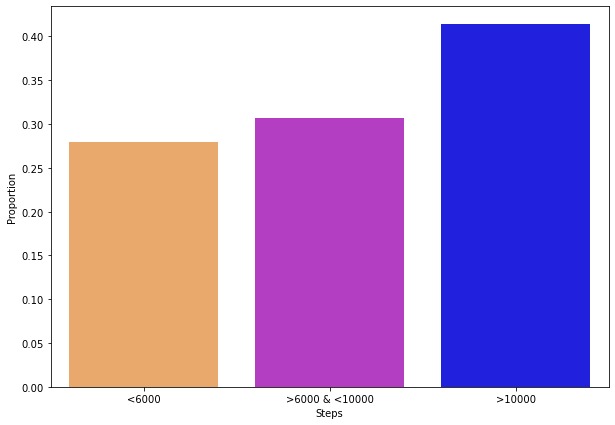

In [48]:
# plotting the proportion of each group
new_df = pd.DataFrame(df['steps_group'].value_counts(normalize = True)).reset_index()
new_df.rename(columns = {'steps_group': 'proportion'}, inplace = True)
new_df

f1 = sns.barplot(x = 'index', y = 'proportion', data = new_df, 
                 order=['<6000', '>6000 & <10000', '>10000'], 
                 palette = 'gnuplot2_r').set(xlabel = "Steps", ylabel = "Proportion")

plt.savefig('proportion_steps.png')

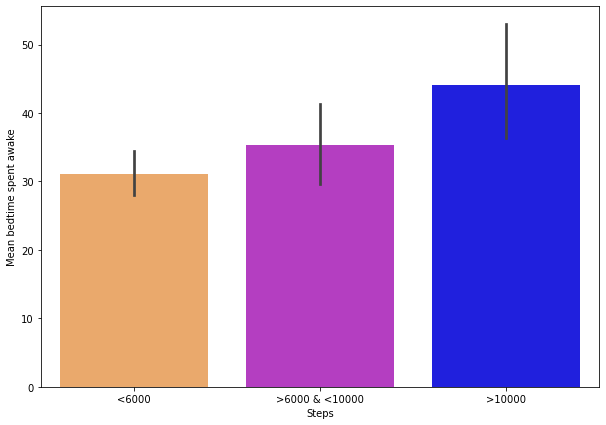

In [49]:
from numpy import mean

# plotting the mean time spent awake in bed for each group 

ax = sns.barplot(x="steps_group", y="awake_bedmin", data=df, 
                 order=['<6000', '>6000 & <10000', '>10000'], 
                 estimator=mean, palette = 'gnuplot2_r').set(xlabel = "Steps", 
                                                             ylabel = "Mean bedtime spent awake")

plt.savefig('barplot_steps.png')

I do the same categorization for the time spent in bed awake and plot the proportion. 
used for 'user types' section and 'steps and time spent falling asleep' section. 

In [50]:
# dividing into categories
conditions = [
    (df['awake_bedmin'] <= 20),
    (df['awake_bedmin'] > 20) & (df['awake_bedmin'] <= 60),
    (df['awake_bedmin'] > 60)
    ]

values = ['fast_sleepers', 'normal_people', 'insomniacs']

df['sleep_type'] = np.select(conditions, values)

df['sleep_type'].value_counts()

normal_people    219
fast_sleepers    129
insomniacs        46
Name: sleep_type, dtype: int64

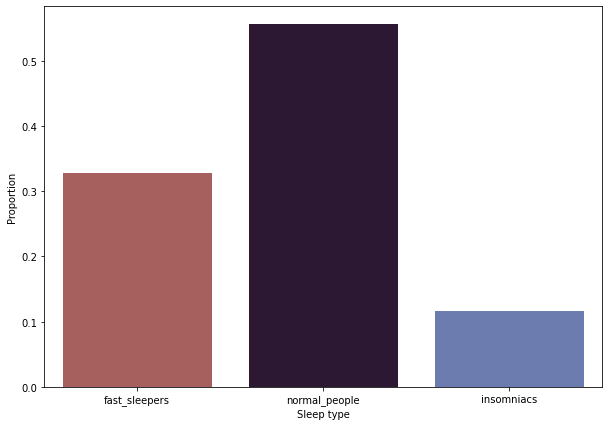

In [51]:
# plotting the proportion of each group
new_df = pd.DataFrame(df['sleep_type'].value_counts(normalize = True)).reset_index()
new_df.rename(columns = {'sleep_type': 'proportion'}, inplace = True)
new_df
ax = sns.barplot(x = 'index', y = 'proportion', data = new_df, 
                 order=['fast_sleepers', 'normal_people', 'insomniacs'], 
                 palette = 'twilight_r').set(xlabel = "Sleep type", ylabel = "Proportion")

plt.savefig('proportion_sleep.png')

Then I do some more visualization for the 'steps and time spent falling asleep' section. 

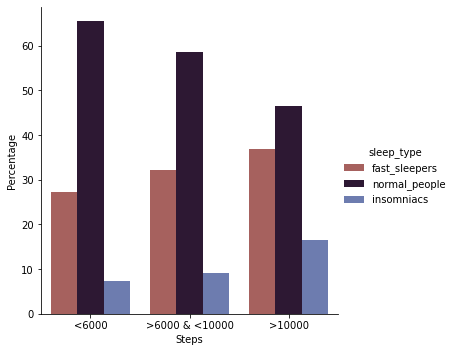

In [52]:
# proportion of each sleep group within each step group

# https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
(df
.groupby('steps_group')['sleep_type']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x = 'steps_group',y = 'percent', hue = 'sleep_type', 
      kind = 'bar',
      order = ['<6000', '>6000 & <10000', '>10000'],
      hue_order = ['fast_sleepers', 'normal_people', 'insomniacs'],
      palette = 'twilight_r')
.set(xlabel = 'Steps', ylabel = 'Percentage'))

plt.savefig('barplot_sleep_steps.png')

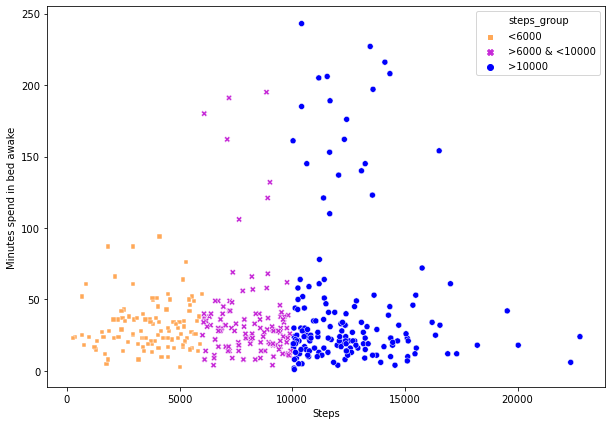

In [53]:
# mintues spent in bed over steps taken on a given day 

ax = sns.scatterplot(data=df, x="TotalSteps", y="awake_bedmin", hue="steps_group", 
                style = 'steps_group', palette = 'gnuplot2_r',
                hue_order = ['<6000', '>6000 & <10000', '>10000']).set(xlabel = 'Steps', ylabel = 'Minutes spend in bed awake')

plt.savefig('scatterplot_steps.png')

And then it is time for the statistics from the 'steps and time spent falling asleep' section. 

In [54]:
# linear mixed effects model predicting time spent awake in bed from steps taken with random intercept for ID. 

step_model = smf.mixedlm("awake_bedmin ~ totalsteps_scaled", df, groups = 'Id')
m2 = step_model.fit()

m2.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM  Dependent Variable:  awake_bedmin
No. Observations:   394      Method:              REML        
No. Groups:         21       Scale:               255.3000    
Min. group size:    2        Log-Likelihood:      -1689.3001  
Max. group size:    32       Converged:           Yes         
Mean group size:    18.8                                      
--------------------------------------------------------------
                   Coef.   Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           32.203    7.244  4.445 0.000 18.005 46.402
totalsteps_scaled   -1.496    1.007 -1.486 0.137 -3.469  0.477
Id Var            1074.154   22.107                           
==============================================================

"""